In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [3]:
df.shape

(119390, 32)

In [4]:
pd.set_option('display.max_columns',32)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
#Replace missing values:
#If no agency is given, booking was most likely made without a ageent
#If none company was given, it was most likely private.

#function to replace null values as 0 

def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())
    

In [7]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
##Visualise the Entire Dataframe
pd.set_option('display.max_columns',32)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [9]:
#take a lool at adults children babies columns
#check unique values

#df['adults'].unique()
list_ch =['children','adults','babies']

for i in list_ch:
    print('{} has unique values such as {}'.format(i, df[i].unique()))

children has unique values such as [ 0.  1.  2. 10.  3.]
adults has unique values such as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values such as [ 0  1  2 10  9]


In [10]:
#Above output tells some noisiness in those columns
#since children,adults and babies values cannot be 0 at a same time, those values must be fitered 

print('Record count where adult,children and babies equal to 0 : ', len(df[ (df['adults']==0) & (df['children']==0) & (df['babies']==0) ]))

#print the unfiltered dataset
df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)]

Record count where adult,children and babies equal to 0 :  180


hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

In [11]:
#exclude above records 
df = df[~((df['children']==0) & (df['adults']==0) & (df['babies']==0))]

In [12]:
df.shape

(119210, 32)

In [13]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

### lets perform country wise analysis 

In [14]:
country_wise_anly = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_anly.columns = ['country','total guests']
country_wise_anly

country  total guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     DJI             1
162     AIA             1
163     PLW             1
164     ASM             1
165     MAC             1

[166 rows x 2 columns]

In [16]:
import plotly.express as px

In [17]:
country_wise_map = px.choropleth( country_wise_anly,
                   locations = country_wise_anly['country'],
                   color = country_wise_anly['total guests'], 
                   hover_name = country_wise_anly['country'], 
                   title = "Home country of guests" )

country_wise_map.show()

                                 Most guests are from Portugal and other countries in Europe

### Analysis of guest pay for a perticular room type for a night

In [18]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [19]:
data_iscan_0 = df[df['is_canceled']==0]

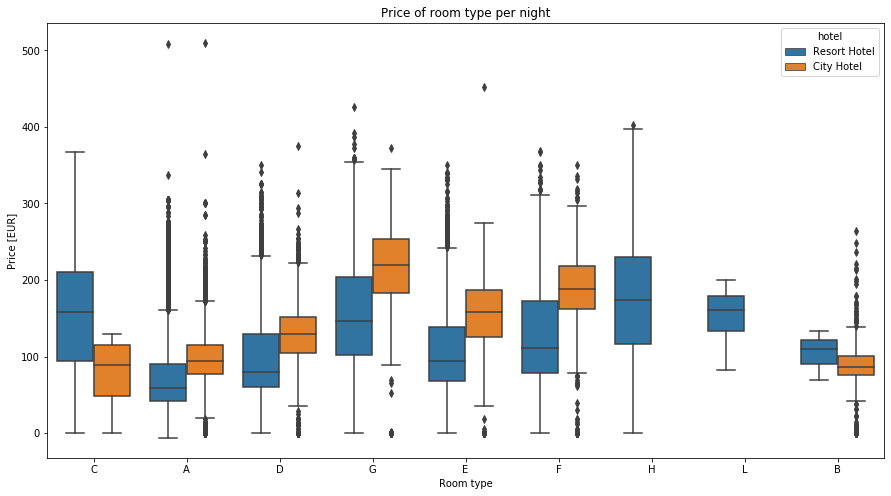

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=data_iscan_0)
plt.title("Price of room type per night")
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.show()

### Analysis of price per night vary over year (compare both city hotel and resort hotel) 

In [23]:
df_resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
df_city = df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [26]:
df_resort.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [27]:
resort_df = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_df

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [28]:
df_city.head()

hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40066  City Hotel            0          3               2015   
40070  City Hotel            0         43               2015   
40071  City Hotel            0         43               2015   
40072  City Hotel            0         43               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40066               July                        27                          2   
40070               July                        27                          3   
40071               July                        27                          3   
40072               July                        27                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
40060                        0                     2       1       0.0   
40066                        0                     3       1       0.0   
40070                        0                     2       2       0.0   
40071                        0                     2       2       0.0   
40072                        0                     2       2       0.0   

       babies meal country market_segment distribution_channel  \
40060       0   HB     PRT  Offline TA/TO                TA/TO   
40066       0   HB     PRT         Groups                TA/TO   
40070       0   HB     PRT         Groups                TA/TO   
40071       0   HB     PRT         Groups                TA/TO   
40072       0   HB     PRT         Groups                TA/TO   

       is_repeated_guest  previous_cancellations  \
40060                  0                       0   
40066                  0                       0   
40070                  0                       0   
40071                  0                       0   
40072                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
40060                               0                  A                  A   
40066                               0                  A                  A   
40070                               0                  A                  A   
40071                               0                  A                  A   
40072                               0                  A                  A   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
40060                0   No Deposit    6.0      0.0                     0   
40066                1   No Deposit    1.0      0.0                     0   
40070                0   No Deposit    1.0      0.0                     0   
40071                1   No Deposit    1.0      0.0                     0   
40072                0   No Deposit    1.0      0.0                     0   

         customer_type    adr  required_car_parking_spaces  \
40060        Transient   0.00                            0   
40066  Transient-Party  58.67                            0   
40070  Transient-Party  86.00                            0   
40071  Transient-Party  43.00                            0   
40072  Transient-Party  86.00                            0   

       total_of_special_requests reservation_status reservation_status_date  
40060                          0          Check-Out                7/3/2015  
40066                          0          Check-Out                7/5/2015  
40070                          0          Check-Out                7/5/2015  
40071                          0          Check-Out                7/5/2015  
40072                          0          Check-Out                7/5/2015

In [29]:
city_df = df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_df

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [32]:
df_res_cit = resort_df.merge(city_df, on='arrival_date_month')
df_res_cit.columns=['month','price_resort','price_city_hotel']
df_res_cit

month  price_resort  price_city_hotel
0       April     75.867816        111.962267
1      August    181.205892        118.674598
2    December     68.410104         88.401855
3    February     54.147478         86.520062
4     January     48.761125         82.330983
5        July    150.122528        115.818019
6        June    107.974850        117.874360
7       March     57.056838         90.658533
8         May     76.657558        120.669827
9    November     48.706289         86.946592
10    October     61.775449        102.004672
11  September     96.416860        112.776582

In [33]:
## we need to order above df for month colum in order to get better insights

In [35]:
import sort_dataframeby_monthorweek as sd

In [39]:
df_res_cit = sd.Sort_Dataframeby_Month(df_res_cit,'month')

In [40]:
df_res_cit

month  price_resort  price_city_hotel
0     January     48.761125         82.330983
1    February     54.147478         86.520062
2       March     57.056838         90.658533
3       April     75.867816        111.962267
4         May     76.657558        120.669827
5        June    107.974850        117.874360
6        July    150.122528        115.818019
7      August    181.205892        118.674598
8   September     96.416860        112.776582
9     October     61.775449        102.004672
10   November     48.706289         86.946592
11   December     68.410104         88.401855

In [43]:
px.line(df_res_cit, x='month', y=['price_resort','price_city_hotel'], title='Room price per night over the Months')

                                    Price in the resort hotel are much higher in summer time period 

### Which are the most busy months

In [45]:
gust_resort=df_resort['arrival_date_month'].value_counts().reset_index()
gust_resort.columns=['month','no of guests_Resort']
gust_resort

month  no of guests_Resort
0      August                 3257
1        July                 3137
2     October                 2575
3       March                 2571
4       April                 2550
5         May                 2535
6    February                 2308
7   September                 2102
8        June                 2037
9    December                 2014
10   November                 1975
11    January                 1866

In [46]:
gust_city =df_city['arrival_date_month'].value_counts().reset_index()
gust_city.columns=['month','no of guests_City']
gust_city

month  no of guests_City
0      August               5367
1        July               4770
2         May               4568
3        June               4358
4     October               4326
5   September               4283
6       March               4049
7       April               4010
8    February               3051
9    November               2676
10   December               2377
11    January               2249

In [48]:
#merge two dfs
df_gust_res_cit = gust_resort.merge(gust_city, on='month')
df_gust_res_cit

month  no of guests_Resort  no of guests_City
0      August                 3257               5367
1        July                 3137               4770
2     October                 2575               4326
3       March                 2571               4049
4       April                 2550               4010
5         May                 2535               4568
6    February                 2308               3051
7   September                 2102               4283
8        June                 2037               4358
9    December                 2014               2377
10   November                 1975               2676
11    January                 1866               2249

In [49]:
## sorting
df_gust_res_cit = sd.Sort_Dataframeby_Month(df_gust_res_cit,'month')

In [50]:
df_gust_res_cit

month  no of guests_Resort  no of guests_City
0     January                 1866               2249
1    February                 2308               3051
2       March                 2571               4049
3       April                 2550               4010
4         May                 2535               4568
5        June                 2037               4358
6        July                 3137               4770
7      August                 3257               5367
8   September                 2102               4283
9     October                 2575               4326
10   November                 1975               2676
11   December                 2014               2377

In [51]:
px.line(df_gust_res_cit, x='month', y=['no of guests_Resort','no of guests_City'], title='Total no of guests per Months')

### Correlations 

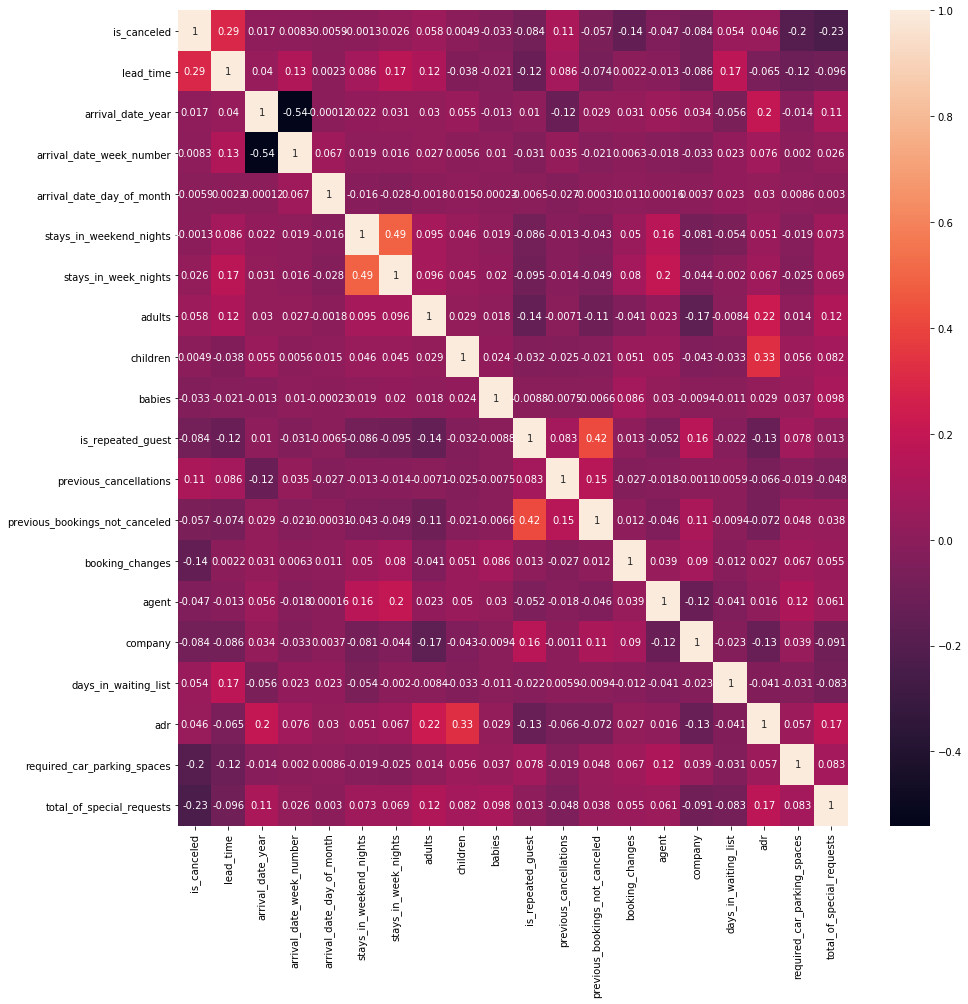

In [52]:
plt.figure(figsize=(15,15))
corr_df = df.corr()
sns.heatmap(corr_df, annot=True)

In [54]:
co_relation = df.corr()["is_canceled"]
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [56]:
co_relation.abs().sort_values(ascending=False)[1:]

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [57]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [58]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

                                     From the co relation list, we can see that that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features
                                     

In [60]:
## get numerical features and categorical features
num_features = [col for col in df.columns if df[col].dtype!='object']
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [61]:
cat_features = [col for col in df.columns if df[col].dtype=='object']
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [62]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [63]:
df_cat = df[cat_features]
df_cat.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date  
0     Transient          Check-Out                7/1/2015  
1     Transient          Check-Out                7/1/2015  
2     Transient          Check-Out                7/2/2015  
3     Transient          Check-Out                7/2/2015  
4     Transient          Check-Out                7/3/2015

In [66]:
## We need to convert 'reservation_status_date' to simple attributes in order to fit a ml model
df_cat['reservation_status_date'] = pd.to_datetime(df_cat['reservation_status_date'])

In [65]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [68]:
df_cat['year'] =df_cat['reservation_status_date'].dt.year
df_cat['month'] =df_cat['reservation_status_date'].dt.month
df_cat['day'] =df_cat['reservation_status_date'].dt.day

In [69]:
df_cat.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date  year  month  day  
0     Transient          Check-Out              2015-07-01  2015      7    1  
1     Transient          Check-Out              2015-07-01  2015      7    1  
2     Transient          Check-Out              2015-07-02  2015      7    2  
3     Transient          Check-Out              2015-07-02  2015      7    2  
4     Transient          Check-Out              2015-07-03  2015      7    3

In [70]:
df_cat.drop('reservation_status_date',axis=1,inplace=True)

In [71]:
## Add 'cancellation' column to df_cat in order to perform meaan incording technique
df_cat['cancellation'] = df['is_canceled']

### Feature Encording - Using  Mean Encording  Technique

In [72]:
df_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'year', 'month',
       'day', 'cancellation'],
      dtype='object')

In [76]:
cols_s = df_cat.columns[0:11]
cols_s

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [77]:
for col in cols_s:
    print(col)
    print(df_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

hotel
{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


arrival_date_month
{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


meal
{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


country
{0: 0.1192468619246862, 'ABW': 0.0, 'AGO': 0.5662983425414365, 'AIA': 0.0, 'ALB': 0.16666666666666666, 'AND': 0.7142857142857143, 'ARE': 0.8431372549019608, 'ARG': 0.2523364485981308, 'ARM': 0.25, 'ASM': 0.0, 'ATA': 0.0, 'ATF': 0.0, 'AUS': 0.2511737089201878, 'AUT': 0.18210609659540775, 'AZE': 0.5294117647058824, 'BDI': 0.0, 'BEL': 0.20239111870196413, 'BEN': 1.0, 'BFA': 0.

In [78]:
for col in cols_s:
    dictN = df_cat.groupby([col])['cancellation'].mean().to_dict()
    df_cat[col] = df_cat[col].map(dictN)

In [79]:
df_cat.head()

hotel  arrival_date_month      meal   country  market_segment  \
0  0.277674            0.374644  0.374106  0.567333        0.153712   
1  0.277674            0.374644  0.374106  0.567333        0.153712   
2  0.277674            0.374644  0.374106  0.202310        0.153712   
3  0.277674            0.374644  0.374106  0.202310        0.187618   
4  0.277674            0.374644  0.374106  0.202310        0.367590   

   distribution_channel  reserved_room_type  assigned_room_type  deposit_type  \
0              0.174868            0.330827            0.188186       0.28402   
1              0.174868            0.330827            0.188186       0.28402   
2              0.174868            0.391567            0.188186       0.28402   
3              0.220568            0.391567            0.445055       0.28402   
4              0.410598            0.391567            0.445055       0.28402   

   customer_type  reservation_status  year  month  day  cancellation  
0       0.407864                   0  2015      7    1             0  
1       0.407864                   0  2015      7    1             0  
2       0.407864                   0  2015      7    2             0  
3       0.407864                   0  2015      7    2             0  
4       0.407864                   0  2015      7    3             0

In [80]:
## Merging cat df and num df
dfNew = pd.concat([df_cat,df[num_features]],axis=1)

In [81]:
dfNew

hotel  arrival_date_month      meal   country  market_segment  \
0       0.277674            0.374644  0.374106  0.567333        0.153712   
1       0.277674            0.374644  0.374106  0.567333        0.153712   
2       0.277674            0.374644  0.374106  0.202310        0.153712   
3       0.277674            0.374644  0.374106  0.202310        0.187618   
4       0.277674            0.374644  0.374106  0.202310        0.367590   
...          ...                 ...       ...       ...             ...   
119385  0.417859            0.377823  0.374106  0.202391        0.343313   
119386  0.417859            0.377823  0.374106  0.185848        0.367590   
119387  0.417859            0.377823  0.374106  0.167193        0.367590   
119388  0.417859            0.377823  0.374106  0.202310        0.367590   
119389  0.417859            0.377823  0.344653  0.167193        0.367590   

        distribution_channel  reserved_room_type  assigned_room_type  \
0                   0.174868            0.330827            0.188186   
1                   0.174868            0.330827            0.188186   
2                   0.174868            0.391567            0.188186   
3                   0.220568            0.391567            0.445055   
4                   0.410598            0.391567            0.445055   
...                      ...                 ...                 ...   
119385              0.410598            0.391567            0.445055   
119386              0.410598            0.292683            0.251603   
119387              0.410598            0.318108            0.251373   
119388              0.410598            0.391567            0.445055   
119389              0.410598            0.391567            0.445055   

        deposit_type  customer_type  reservation_status  year  month  day  \
0            0.28402       0.407864                   0  2015      7    1   
1            0.28402       0.407864                   0  2015      7    1   
2            0.28402       0.407864                   0  2015      7    2   
3            0.28402       0.407864                   0  2015      7    2   
4            0.28402       0.407864                   0  2015      7    3   
...              ...            ...                 ...   ...    ...  ...   
119385       0.28402       0.407864                   0  2017      9    6   
119386       0.28402       0.407864                   0  2017      9    7   
119387       0.28402       0.407864                   0  2017      9    7   
119388       0.28402       0.407864                   0  2017      9    7   
119389       0.28402       0.407864                   0  2017      9    7   

        cancellation  is_canceled  ...  arrival_date_day_of_month  \
0                  0            0  ...                          1   
1                  0            0  ...                          1   
2                  0            0  ...                          1   
3                  0            0  ...                          1   
4                  0            0  ...                          1   
...              ...          ...  ...                        ...   
119385             0            0  ...                         30   
119386             0            0  ...                         31   
119387             0            0  ...                         31   
119388             0            0  ...                         31   
119389             0            0  ...                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         .

In [82]:
## drop 1 cancellation column 
dfNew.drop(['cancellation'],axis=1,inplace=True)

### Handle Outliers 

In [83]:
## Outtlier Detection

In [84]:
def plot(col):
    fig, (ax1,ax2)=plt.subplots(2,1)
    sns.distplot(dfNew[col],ax=ax1)
    sns.boxplot(dfNew[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

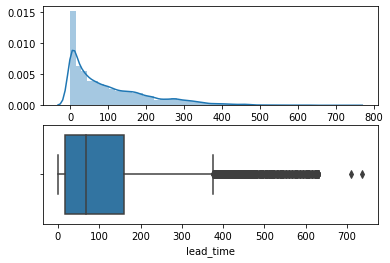

In [85]:
plt.figure(figsize=(30,20))
plot('lead_time')

<Figure size 2160x1440 with 0 Axes>

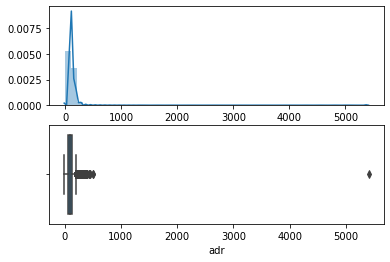

In [86]:
plt.figure(figsize=(30,20))
plot('adr')

<Figure size 2160x1440 with 0 Axes>

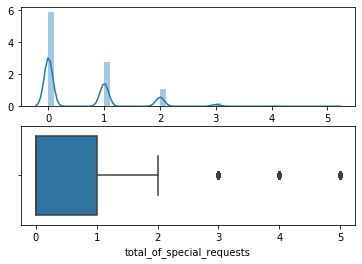

In [87]:
plt.figure(figsize=(30,20))
plot('total_of_special_requests')

In [90]:
## Treat Outliers

In [91]:
def handle_outlier(col):
    dfNew[col] = np.log1p(dfNew[col])

In [92]:
handle_outlier('lead_time')

<Figure size 2160x1440 with 0 Axes>

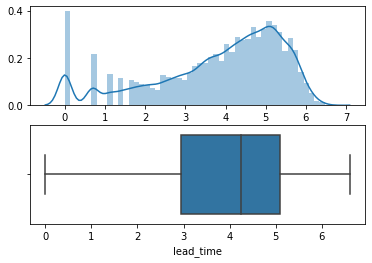

In [93]:
plt.figure(figsize=(30,20))
plot('lead_time')

In [94]:
handle_outlier('adr')

<Figure size 2160x1440 with 0 Axes>

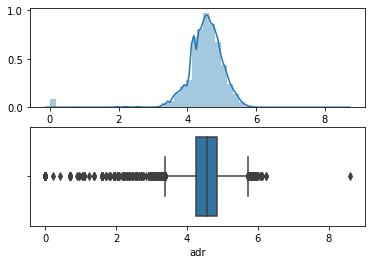

In [95]:
plt.figure(figsize=(30,20))
plot('adr')

In [97]:
## check null value again to ensure that no null values are appear in the new dataset 
dfNew.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status                0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes             

In [98]:
## only missing 1 value in adr feature, we gonna drop that
dfNew.dropna(inplace=True)

In [99]:
## separate dependent & independent features
X = dfNew.drop('is_canceled',axis=1)
y = dfNew['is_canceled']

### Feature Importance  

In [100]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [128]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.000001, random_state=0))
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=1e-06, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [129]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False,  True,  True,  True])

In [132]:
cols = X.columns
selected_features = cols[(feature_sel_model.get_support())]
selected_features

Index(['deposit_type', 'customer_type', 'reservation_status', 'year', 'month',
       'lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'adults', 'children', 'is_repeated_guest',
       'booking_changes', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [131]:
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_features)))

total features: 33
selected features: 16


In [143]:
X = X[selected_features]

### Model Building 

In [145]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)

In [146]:
print(X_train.shape)
print(X_test.shape)

(89406, 16)
(29803, 16)


In [169]:
## check whether target variable is balance or not
y_train.value_counts()

0    56371
1    33035
Name: is_canceled, dtype: int64

#### XGBoost Algo 

In [148]:
from xgboost import XGBClassifier

In [149]:
classifier = XGBClassifier()

In [150]:
## hyperParameter optimization with respect to XGBoost

params = {
    
    'learning_rate'    : [0.05, 0.20, 0.25],
    'max_depth'        : [5, 8, 10, 12],
    'min_child_weight' : [1, 3, 5, 7],
    'gamma'            : [0.0, 0.1, 0.2, 0.4],
    'colsample_bytree' : [0.3, 0.4, 0.7]
}

In [151]:
## use RandomizedSearchCV insted of GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [152]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [153]:
random_search = RandomizedSearchCV(classifier, param_distributions = params,  scoring='roc_auc', cv= 5, n_jobs=-1,verbose=3)

In [154]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:   26.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.0s finished


[10:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_j

In [155]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [156]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [157]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [158]:
classifier.fit(X_train, y_train)

[10:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [159]:
print('Training score : {}'.format(classifier.score(X_train,y_train)))

Training score : 1.0


In [160]:
## Predictions

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [162]:
y_pred = classifier.predict(X_test)

In [163]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[18639     0]
 [    0 11164]]


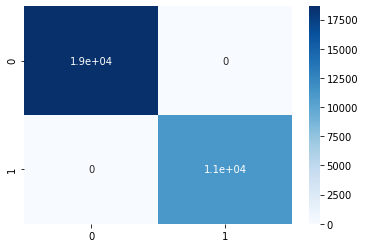

In [164]:
sns.heatmap(confusion, annot=True, cmap='Blues')

In [165]:
print('Accuracy score is : {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score is : 1.0


#### Cross Validate Model XGBoost 

In [166]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)

[11:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [167]:
score.mean()

1.0

                        Since XGBoost gives best possible accuracy, we didn't check for other ML Algorithms

### Save the model 

In [170]:
import pickle

In [179]:
file = open('XGBoost_model.pkl','wb')

In [182]:
## dump information to that file
pickle.dump(classifier, file)

In [183]:
#load
modelpickle = open('XGBoost_model.pkl','rb')
modelXGBoost = pickle.load(modelpickle)

In [184]:
print(modelXGBoost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)


In [185]:
y_pred_save = modelXGBoost.predict(X_test)

In [187]:
print('Accuracy score is : {}'.format(accuracy_score(y_test, y_pred_save)))

Accuracy score is : 1.0
